/var/folders/q5/3gdpzhz56vdb5ymrs8jgrsdc0000gn/T/ipykernel_88165/671449028.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna('Various', inplace=True)


Linear Regression - MSE: 1.2957102918279118 R2: 0.4307345134418483
Decision Tree Regression - MSE: 0.05424385138670853 R2: 0.9761681661037976


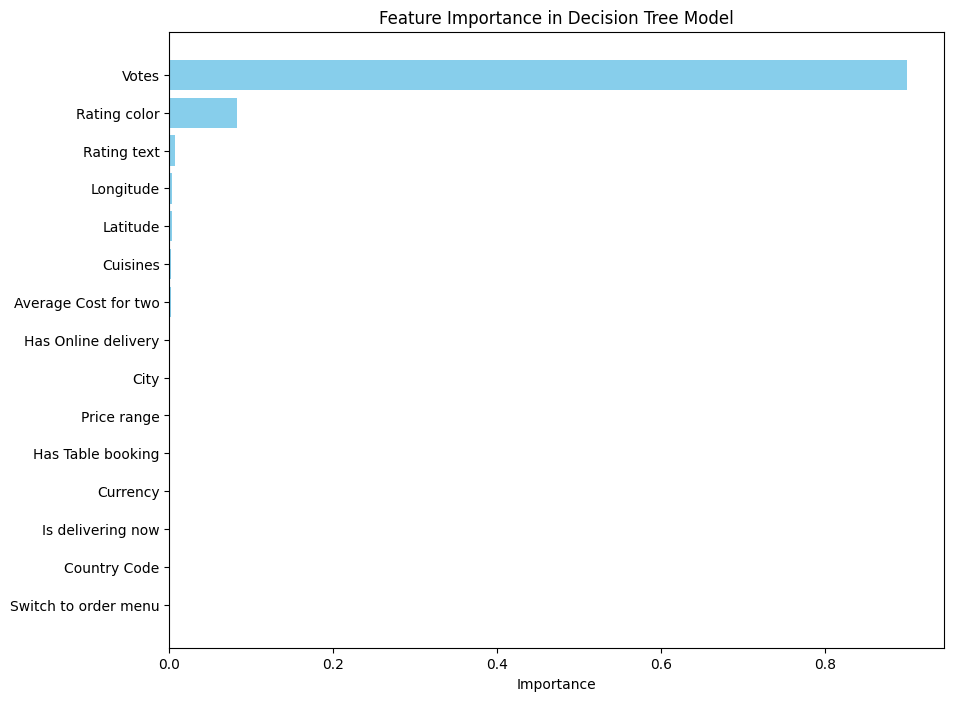

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset.csv'  # Adjust this path to where your dataset is stored
data = pd.read_csv(file_path)

# Handling missing values by filling with a placeholder
data['Cuisines'].fillna('Various', inplace=True)

# Encoding categorical variables
categorical_features = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
                        'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
encoders = {feature: LabelEncoder() for feature in categorical_features}
for feature in categorical_features:
    data[feature] = encoders[feature].fit_transform(data[feature])

# Splitting the dataset
X = data.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 
               'Aggregate rating'], axis=1)
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)

linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Model predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluating the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Linear Regression - MSE:", mse_linear, "R2:", r2_linear)
print("Decision Tree Regression - MSE:", mse_tree, "R2:", r2_tree)

# Feature importance from the decision tree model
feature_importances = decision_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()
